# ATA testing example

There are several ways of testing for <a href="https://en.m.wikipedia.org/wiki/Coeliac_disease">coeliac disease, a metabolic disorder</a> in which the body responds to gluten proteins (gliadins and glutenins) in wheats, wheat hybrids, barley, oats and rye. One diagnostic approach looks at genetic markers in the HLA-DQ (Human Leukocyte Antigen type DQ), part of the MHC (Major Histocompatibility Complex) Class II receptor system. Genetic testing for a particular haplotype of the HLA-DQ2 gene, called DQ2.5, can lead to a diagnosis in most patients. Unfortunately, it's slow and expensive. Another test, a colonoscopic biopsy of the intestines, looks at the intestinal villi, short protrusions (about 1mm long) into the intestine, for tell-tale damage – but this test is unpleasant, possibly painful and costly.

So, a more frequent way is by looking for evidence of an autoantibody called anti-tissue transglutaminase antibody (ATA) – unrelated to <a href="http://stargate.wikia.com/wiki/Ancient_Technology_Activation_gene">this gene</a>, sadly. ATA testing is cheap and cheerful, and relatively good, with a sensitivity ($Sˆ+_{ATA}$) of 85% and specificity ($Sˆ-_{ATA}$) of 97%.(Lock, R.J. <em>et al. </em>(1999). <a href="https://www.ncbi.nlm.nih.gov/pubmed/10474519">IgA anti-tissue transglutaminase as a diagnostic marker of gluten sensitive enteropathy</a>. <em>J Clin Pathol</em> <strong>52</strong>(4):274-7.) We also know the rough probability of a sample being from someone who actually has coeliac disease – for a referral lab, it's about 1%.

Let's consider the following case study. A patient gets tested for coeliac disease. Depending on whether the test is positive or negative, what are the chances she has coeliac disease?


## Setting up the constants

First, we need to set our seed variables, i.e. the variables we know be definition:

* $p(D_{coeliac})$ (`p_coeliac`): 0.01
* $S^+_{ATA} = p(+ | D_{coeliac})$ (`ATA_sensitivity`): 0.85
* $S^-_{ATA} = p(- | \neg D_{coeliac})$ (`ATA_specificity`): 0.97

In [1]:
D_coeliac = 0.01
ATA_specificity = 0.97
ATA_sensitivity = 0.85

Because events are mutually exclusive ($ p(E \mid \neg E) = 0 $), we can express $ p(\neg D_{coeliac}) $ as $ 1 - p(D_{coeliac}) $.

## ATA positive

If ATA is positive (event $ATA^+$), what's the likelihood the patient has coeliac disease (probability $p(D_{coeliac} \mid ATA^+)$)?

By Bayes' theorem, we get

$$ p(D_{coeliac} \mid ATA^+) = \frac{p(ATA^+ \mid D_{coeliac}) \cdot p(D_{coeliac})}{p(ATA^+)} $$

Let's consider each term in isolation.

### $p(ATA^+)$

The value of $p(ATA^+)$ is the uncondtional probability of a positive test result, calculated as the sum of true and false positives, using specificity ($ S^-_{ATA} $) and sensitivity ($ S^+_{ATA} $).

$$ p(ATA^+_{true}) = p(+ \mid D_{coeliac}) \cdot p(D_{coeliac}) = S^+_{ATA} \cdot p(D_{coeliac}) $$

$$ p(ATA^+_{false}) = p(+ \mid D_{\neg coeliac}) \cdot p(D_{\neg coeliac}) = (1 - S^-_{ATA}) \cdot (1 - D_{coeliac}) $$



In [2]:
ATA_true_pos = ATA_sensitivity * D_coeliac
ATA_false_pos = (1 - ATA_specificity) * (1 - D_coeliac)

### $p(D_{coeliac})$

The value of $p(D_{coeliac})$ the known frequency of coeliac disease in the population examined, and set at 1% or $0.01$. In reality, the prevalence of coeliac disease in the population is approximately 1:400 or $0.0025$, but it's important to remember that the probability of the actual event has to necessarily pertain to the probability of the event *as perceived at the point of analysis*, in this case, at the lab. Purely statistically, the people referred to the lab are not a random sample from the population – they're referred to the lab for a *reason*, and that reason is that they show symptoms that *might be* coeliac disease. Bottom line – always know the base population.

## $p(ATA^+ \mid D_{coeliac})$

The conditional probability of $ATA^+$ given $D_{coeliac}$ comprises the cases when the patient has coeliac disease, and the test correctly detects it – in other words, the sensitivity $S^+_{ATA}$.

$$ p(ATA^+ \mid D_{coeliac}) = p(+ \mid D_{coeliac}) = S^+_{ATA} $$

## $p(D_{coeliac} \mid ATA^{+})$

Per Bayes' theorem, 

$$ p(D_{coeliac} \mid ATA^{+}) = \frac{p(ATA^{+} \mid D_{coeliac}) \cdot p(D_{coeliac})}{p(ATA^{+})} $$

Expanding that,

$$ p(D_{coeliac} \mid ATA^+) = \frac{S^+_{ATA} \cdot p(D_{coeliac})}{p(ATA^+_{true}) + p(ATA^+_{false})} $$

In [3]:
p_coeliac_if_ATA_pos = ((ATA_sensitivity * D_coeliac)/(ATA_true_pos + ATA_false_pos))

print("The probability that a positive ATA test result came from a person who actually has coeliac disease is {coeliac_ATA:.2f}%.".format(coeliac_ATA = p_coeliac_if_ATA_pos * 100))


The probability that a positive ATA test result came from a person who actually has coeliac disease is 22.25%.


## Visualised...

One of the features is that incremental increases in sensitivity and specificity have unequal results. This is best seen when plotting them in a two-dimensional space for a fixed value of $D$.

In [15]:
# First, we need to describe the relationship between the
# variables as a single function.

def ATA_sensitivity_specificity_function(sensitivity, specificity, D = 0.01):   
    true_pos = sensitivity * D
    false_pos = (1 - specificity) * (1 - D)
    
    return ((sensitivity * D) / (true_pos + false_pos))

In [40]:
%matplotlib inline
from numpy import arange
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, title, show
import matplotlib.pyplot as plt
import numpy as np

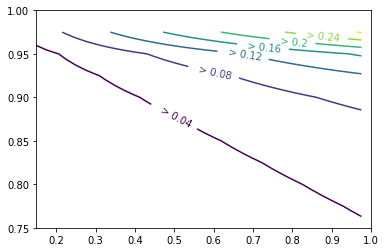

In [65]:
delta = 0.025
x, y = np.arange(0, 1, delta), np.arange(0, 1, delta)
X, Y = np.meshgrid(x, y)
Z = ATA_sensitivity_specificity_function(X, Y)

CS.levels = ["{:.1f}".format(100*val) for val in CS.levels]

plt.figure()
CS = plt.contour(X, Y, Z)
CS.ax.set_xlim(0.15, 1)
CS.ax.set_ylim(0.75, 1)
plt.clabel(CS, CS.levels, inline = True, fmt = " > %r", fontsize = 10)
plt.show()

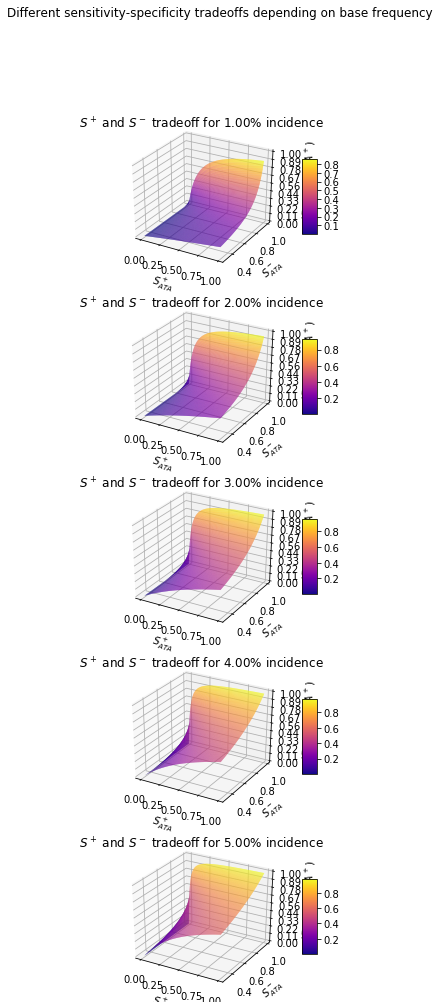

In [29]:
# To turn this into a D-conditional 3d plot, we can turn the X, Y and Z values into a 3D surface.
#
# Warning: this is gonna take a truckload of time if you set the resolution too high.

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

######
# Define list of D-values here
######
D_values = (0.1, 0.2, 0.3, 0.4, 0.5)

# Define value ranges
sensitivity = arange(0.0, 0.99, 0.005)
specificity = arange(0.3, 0.99, 0.005)

# Creates point mesh grid
X,Y = meshgrid(sensitivity, specificity)

# Create fig
fig = plt.figure(figsize = plt.figaspect(len(D_values)))
fig.suptitle("Different sensitivity-specificity tradeoffs depending on base frequency")

for idx, val in enumerate(D_values):

    ax = fig.add_subplot(len(D_values), 1, idx + 1,  projection = '3d')

    # Creates value for each point on the mesh grid
    Z = ATA_sensitivity_specificity_function(X, Y, D = val)

    surf = ax.plot_surface(X, Y, Z, 
                           rstride = 1, cstride = 1, 
                           cmap = cm.plasma,
                           linewidth = 0, 
                           antialiased = True)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    fig.colorbar(surf, shrink=0.5, aspect=5)

    ax.set_xlabel("$ S^+_{ATA} $")
    ax.set_ylabel("$ S^-_{ATA} $")
    ax.set_zlabel("$ p(D_{coeliac} \mid ATA^+)% $")
    ax.set_zlim3d(0, 1)
    ax.set_title("$S^+$ and $S^-$ tradeoff for {v:.2f}% incidence".format(v = 10*val))

### SHOW PLOT

plt.show()